In [11]:
#21BDS0125
#Luv Sachdeva
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv'
horse_df = pd.read_csv(url)

In [12]:
dimensions = horse_df.shape

dimensions


(299, 28)

In [13]:
missing_data = horse_df.isnull().sum()
missing_data

,0
surgery,0
age,0
hospital_number,0
rectal_temp,60
pulse,24
respiratory_rate,58
temp_of_extremities,56
peripheral_pulse,69
mucous_membrane,47
capillary_refill_time,32


In [14]:
numerical_cols = horse_df.select_dtypes(include=['float64', 'int64']).columns
horse_df[numerical_cols] = horse_df[numerical_cols].fillna(horse_df[numerical_cols].median())

In [15]:
categorical_cols = horse_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    horse_df[col] = horse_df[col].fillna(horse_df[col].mode()[0])

In [16]:

missing_data_after_cleaning = horse_df.isnull().sum().sum()

missing_data_after_cleaning


0

In [17]:

# Mean
mean_values = horse_df[numerical_cols].mean()
print("\nMean Values:\n", mean_values)

# Median
median_values = horse_df[numerical_cols].median()
print("\nMedian Values:\n", median_values)

# Quantiles (0%, 25%, 50%, 75%, 100% - covers quartiles as well)
quantiles = horse_df[numerical_cols].quantile([0.25, 0.5, 0.75])
print("\nQuantiles:\n", quantiles)

# Deciles (0% to 100% at 10% intervals)
deciles = horse_df[numerical_cols].quantile(np.arange(0, 1.1, 0.1))
print("\nDeciles:\n", deciles)

# Percentiles (1% intervals from 0% to 100%)
percentiles = horse_df[numerical_cols].quantile(np.arange(0, 1.01, 0.01))
print("\nPercentiles:\n", percentiles)




Mean Values:
 hospital_number          1.087733e+06
rectal_temp              3.817492e+01
pulse                    7.135786e+01
respiratory_rate         2.940134e+01
nasogastric_reflux_ph    4.948161e+00
packed_cell_volume       4.618060e+01
total_protein            2.242308e+01
abdomo_protein           2.549833e+00
lesion_1                 3.659709e+03
lesion_2                 9.052843e+01
lesion_3                 7.387960e+00
dtype: float64

Median Values:
 hospital_number          530301.0
rectal_temp                  38.2
pulse                        64.0
respiratory_rate             25.0
nasogastric_reflux_ph         5.0
packed_cell_volume           45.0
total_protein                 7.5
abdomo_protein                2.3
lesion_1                   2322.0
lesion_2                      0.0
lesion_3                      0.0
dtype: float64

Quantiles:
       hospital_number  rectal_temp  pulse  respiratory_rate  \
0.25         528904.0         37.9   48.5              20.0   
0.50   

In [19]:
from scipy.stats import skew, kurtosis
# Range
range_values = horse_df[numerical_cols].max() - horse_df[numerical_cols].min()
print("\nRange:\n", range_values)

# Interquartile Range (IQR)
iqr_values = horse_df[numerical_cols].quantile(0.75) - horse_df[numerical_cols].quantile(0.25)
print("\nInterquartile Range (IQR):\n", iqr_values)

# Interdecile Range (90th - 10th percentiles)
interdecile_range = horse_df[numerical_cols].quantile(0.9) - horse_df[numerical_cols].quantile(0.1)
print("\nInterdecile Range:\n", interdecile_range)

# Standard Deviation
std_dev_values = horse_df[numerical_cols].std()
print("\nStandard Deviation:\n", std_dev_values)

# Skewness
skewness_values = horse_df[numerical_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness:\n", skewness_values)

# Kurtosis
kurtosis_values = horse_df[numerical_cols].apply(lambda x: kurtosis(x.dropna()))
print("\nKurtosis:\n", kurtosis_values)



Range:
 hospital_number          4787153.0
rectal_temp                    5.4
pulse                        154.0
respiratory_rate              88.0
nasogastric_reflux_ph          6.5
packed_cell_volume            52.0
total_protein                 85.7
abdomo_protein                10.0
lesion_1                   41110.0
lesion_2                    7111.0
lesion_3                    2209.0
dtype: float64

Interquartile Range (IQR):
 hospital_number          5832.0
rectal_temp                 0.6
pulse                      39.5
respiratory_rate           14.5
nasogastric_reflux_ph       0.0
packed_cell_volume         11.0
total_protein              45.4
abdomo_protein              0.0
lesion_1                 1097.5
lesion_2                    0.0
lesion_3                    0.0
dtype: float64

Interdecile Range:
 hospital_number          4750556.80
rectal_temp                    1.42
pulse                         70.00
respiratory_rate              33.20
nasogastric_reflux_ph         


Frequency Distributions:
 {'hospital_number': hospital_number
(513688.847, 997191.3]    264
(4826913.7, 5305629.0]     35
(997191.3, 1475906.6]       0
(1475906.6, 1954621.9]      0
(1954621.9, 2433337.2]      0
(2433337.2, 2912052.5]      0
(2912052.5, 3390767.8]      0
(3390767.8, 3869483.1]      0
(3869483.1, 4348198.4]      0
(4348198.4, 4826913.7]      0
Name: count, dtype: int64, 'rectal_temp': rectal_temp
(38.1, 38.64]      148
(37.56, 38.1]       63
(37.02, 37.56]      31
(38.64, 39.18]      23
(39.18, 39.72]      18
(36.48, 37.02]       7
(35.94, 36.48]       3
(40.26, 40.8]        3
(39.72, 40.26]       2
(35.395, 35.94]      1
Name: count, dtype: int64, 'pulse': pulse
(45.4, 60.8]      86
(60.8, 76.2]      64
(29.846, 45.4]    47
(76.2, 91.6]      38
(91.6, 107.0]     29
(107.0, 122.4]    19
(122.4, 137.8]     8
(137.8, 153.2]     5
(153.2, 168.6]     2
(168.6, 184.0]     1
Name: count, dtype: int64, 'respiratory_rate': respiratory_rate
(16.8, 25.6]     126
(7.912, 16.8]   

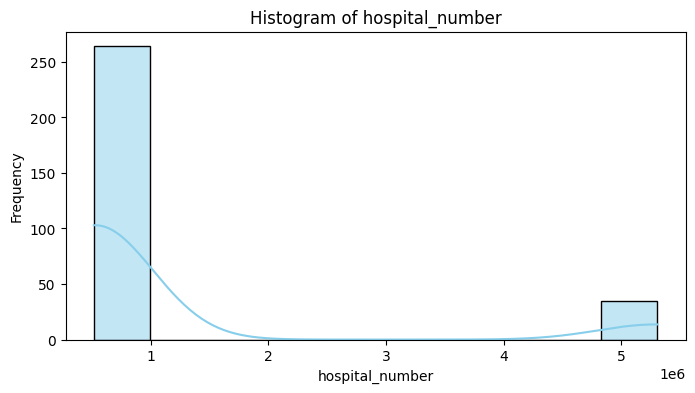

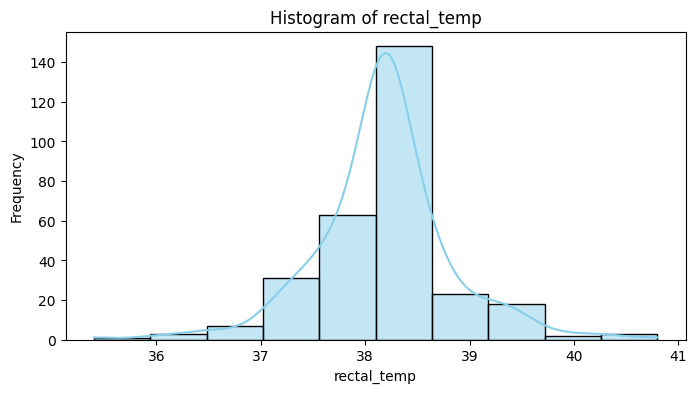

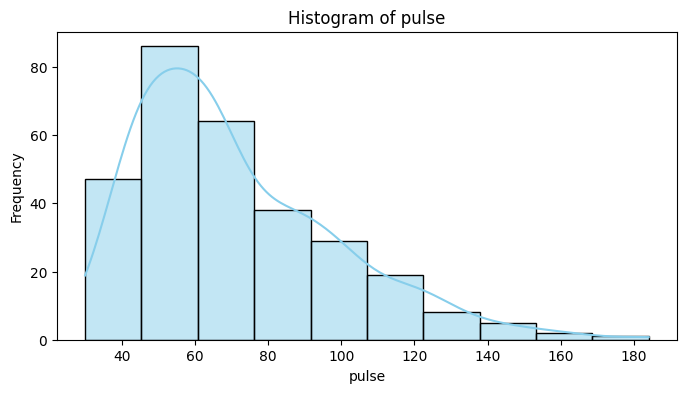

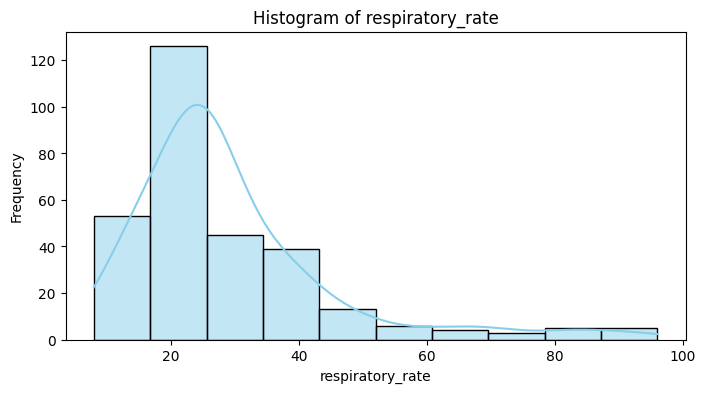

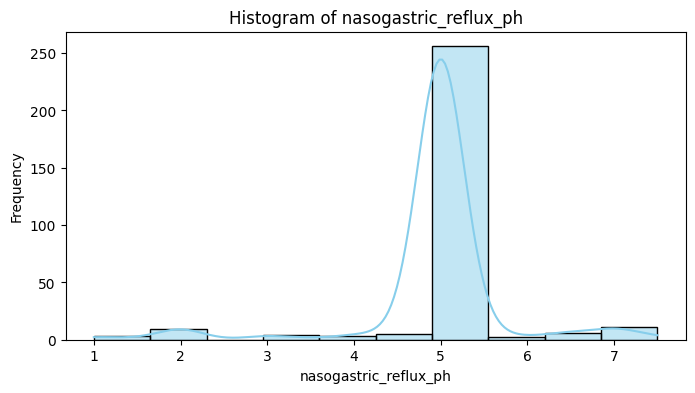

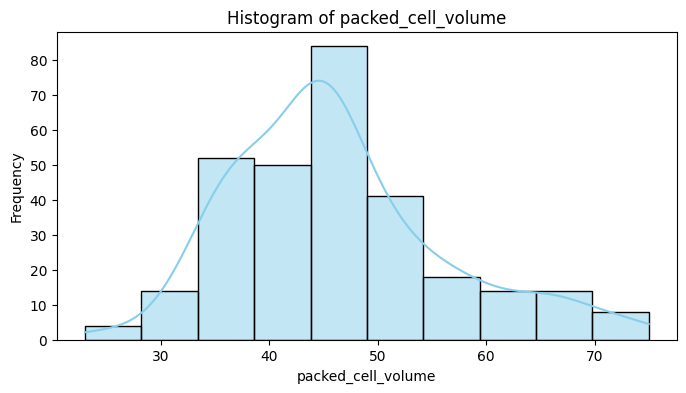

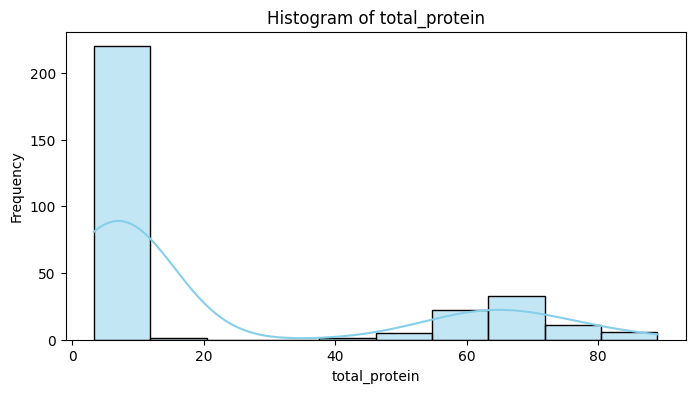

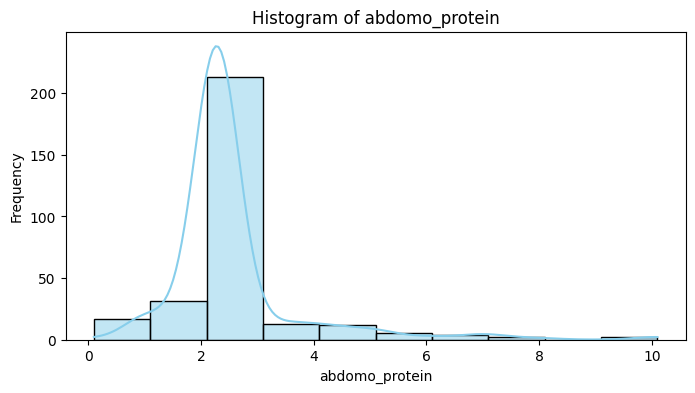

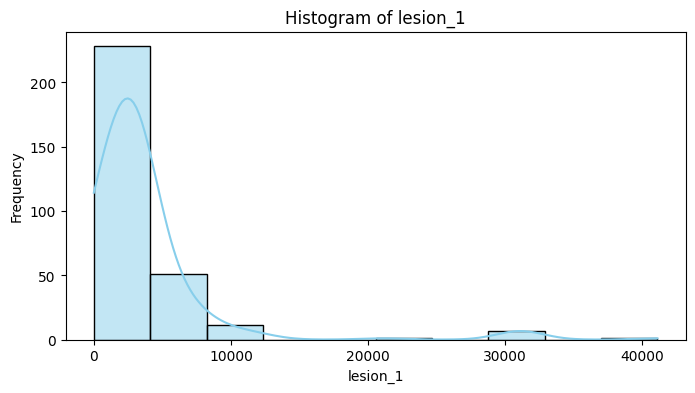

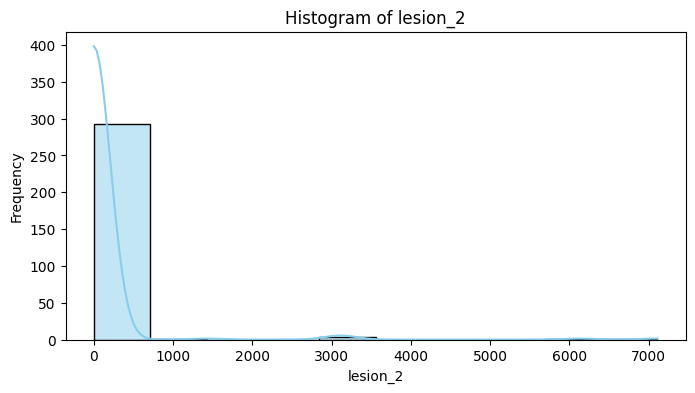

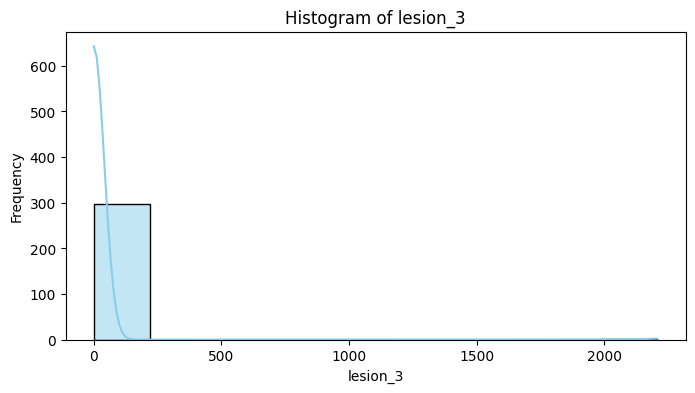


Relative Frequency Distributions:
 {'hospital_number': hospital_number
530693     0.006689
528931     0.006689
528996     0.006689
532349     0.006689
528890     0.006689
             ...   
533696     0.003344
5297379    0.003344
533736     0.003344
534963     0.003344
534618     0.003344
Name: proportion, Length: 283, dtype: float64, 'rectal_temp': rectal_temp
38.2    0.254181
38.0    0.083612
38.5    0.063545
38.3    0.060201
37.8    0.056856
38.1    0.040134
37.5    0.040134
38.6    0.040134
38.4    0.036789
37.9    0.023411
37.2    0.023411
37.6    0.023411
37.7    0.023411
38.7    0.023411
37.3    0.020067
38.8    0.020067
39.2    0.016722
39.3    0.013378
39.5    0.013378
38.9    0.013378
39.0    0.013378
39.4    0.010033
37.1    0.010033
37.4    0.010033
40.3    0.006689
37.0    0.006689
39.1    0.006689
36.5    0.006689
36.9    0.003344
40.8    0.003344
36.6    0.003344
36.1    0.003344
35.4    0.003344
36.0    0.003344
36.8    0.003344
39.6    0.003344
39.9    0.003344
36.4 

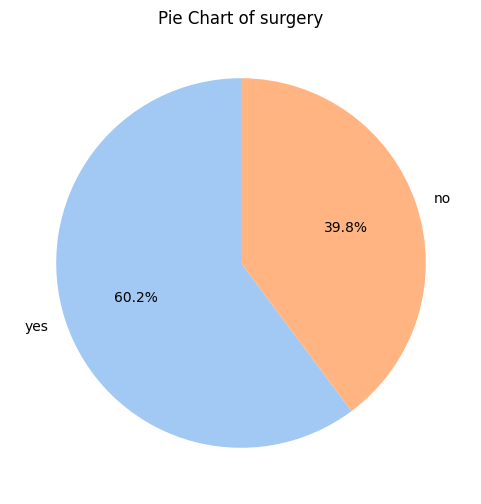

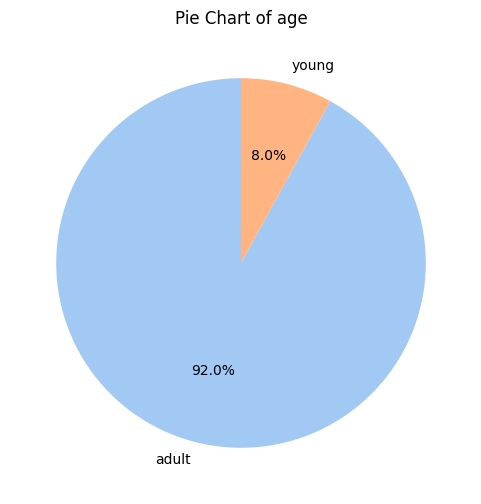

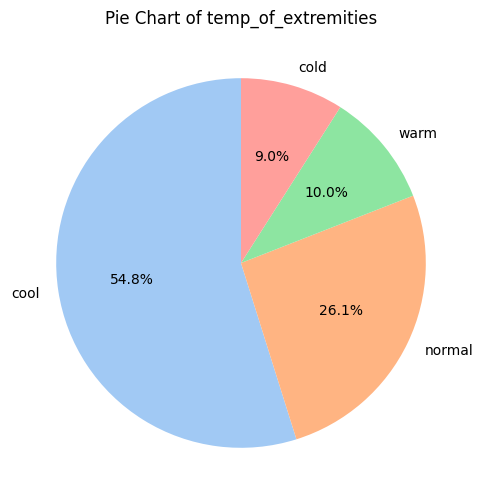

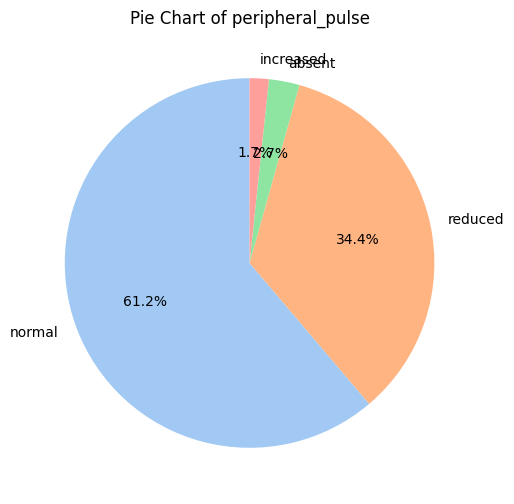

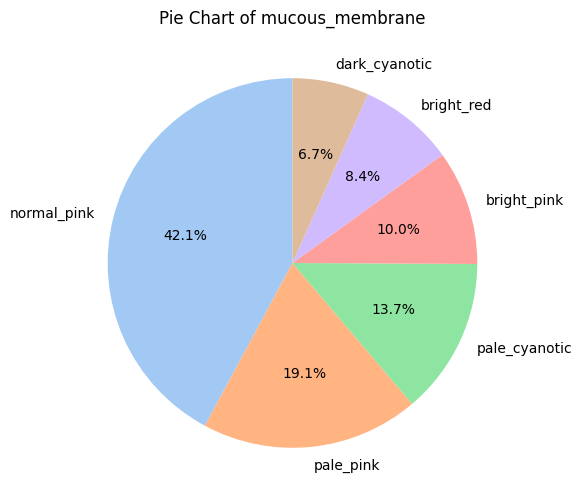

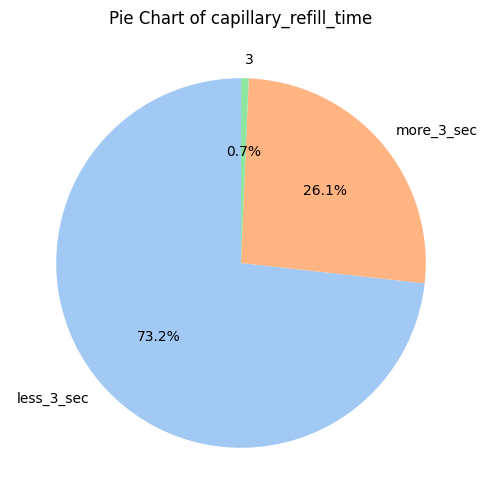

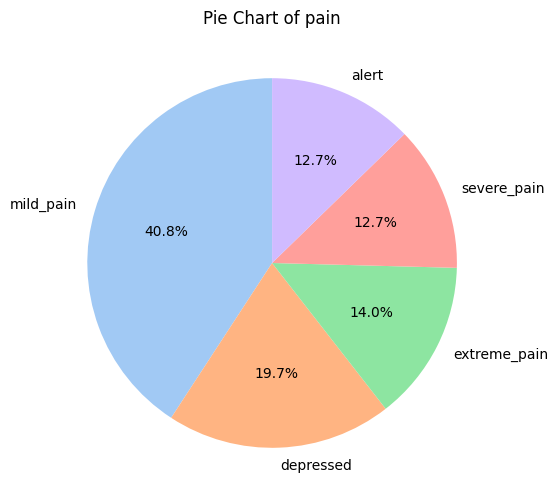

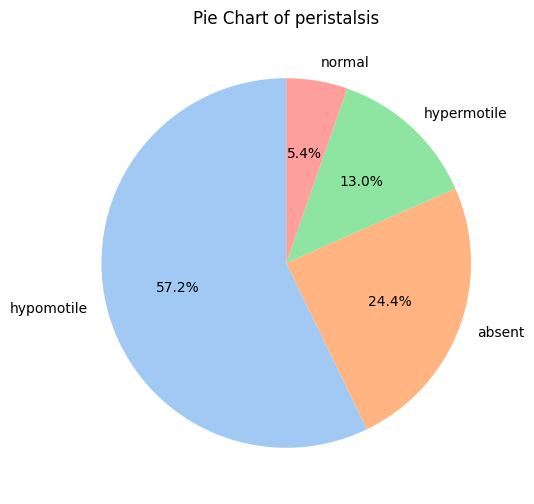

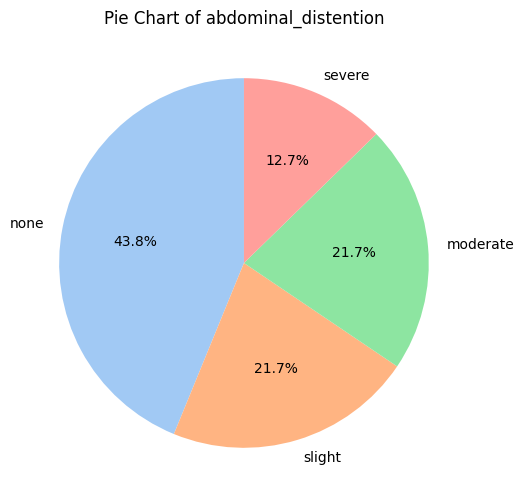

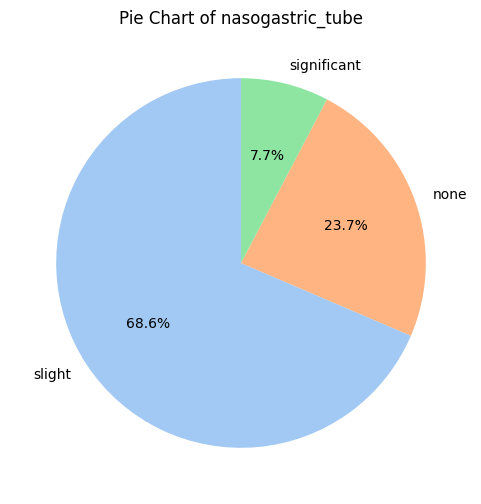

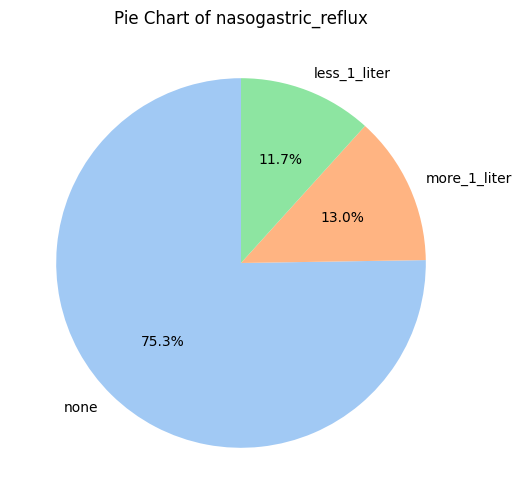

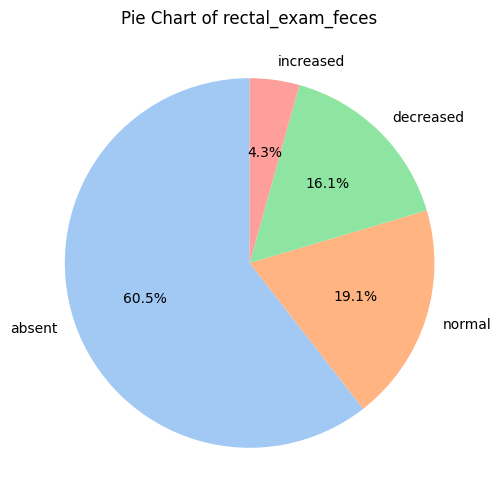

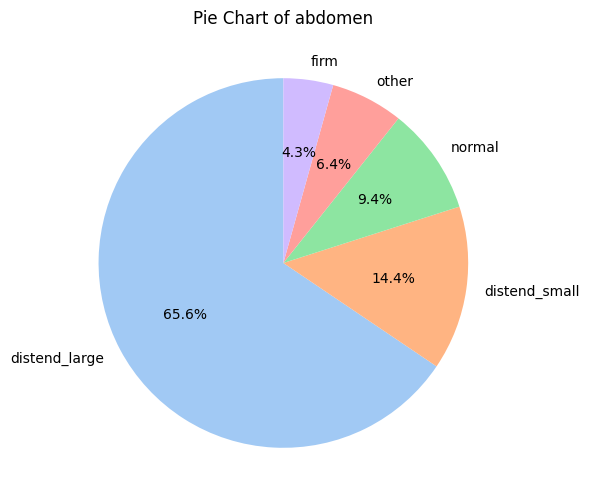

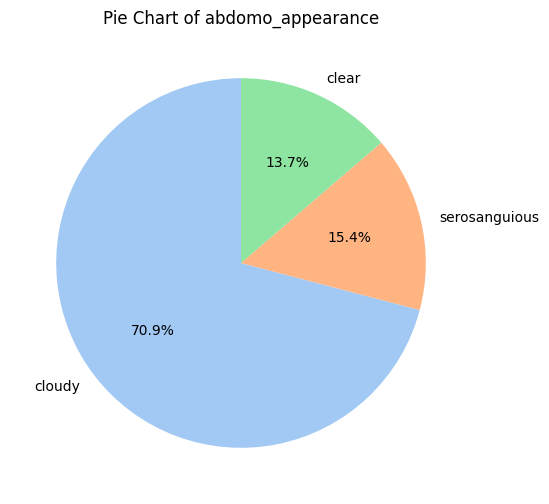

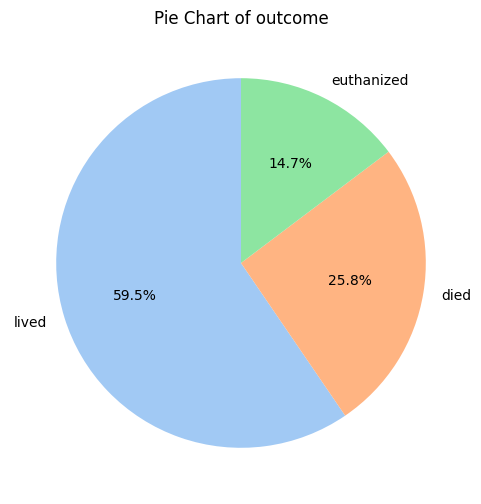

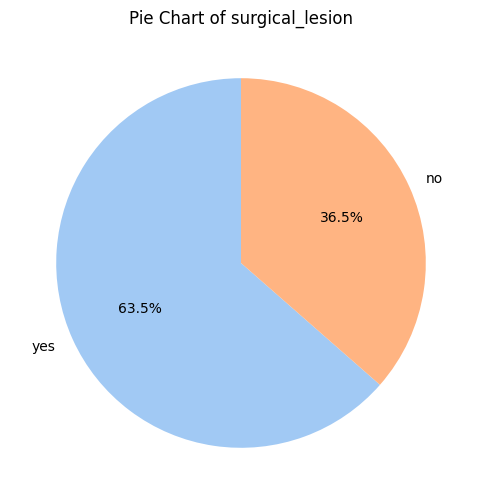

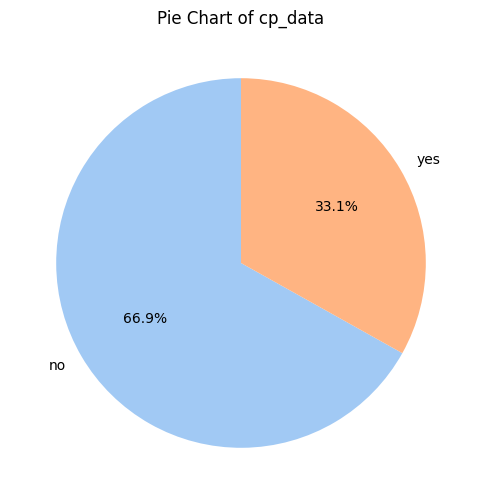

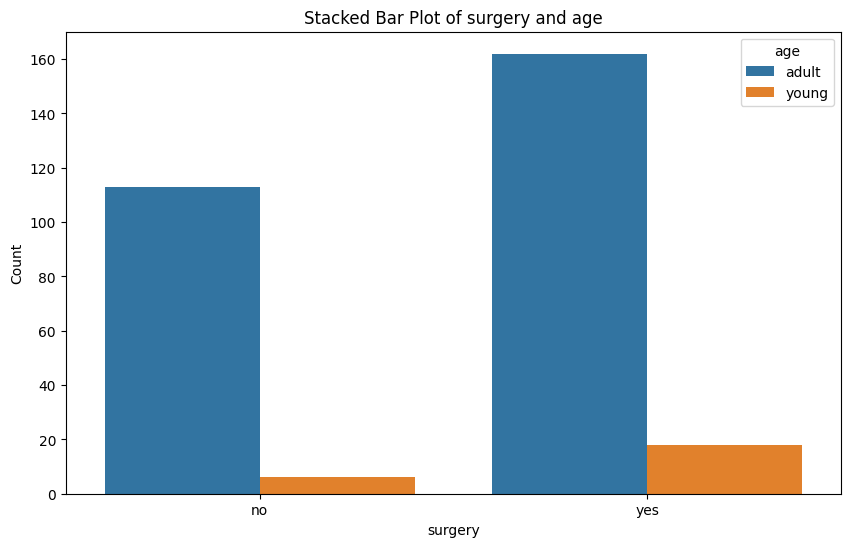

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
frequency_distributions = {}
for col in numerical_cols:
    frequency_distributions[col] = pd.cut(horse_df[col], bins=10).value_counts()
print("\nFrequency Distributions:\n", frequency_distributions)

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(horse_df[col], bins=10, kde=True, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Relative Frequency Distribution
relative_frequency_distributions = {col: horse_df[col].value_counts(normalize=True) for col in numerical_cols}
print("\nRelative Frequency Distributions:\n", relative_frequency_distributions)

# Cumulative Frequency Distribution
cumulative_frequency_distributions = {col: horse_df[col].value_counts(normalize=True).cumsum() for col in numerical_cols}
print("\nCumulative Frequency Distributions:\n", cumulative_frequency_distributions)

### 4. Categorical Data Analysis: Pie Chart and Stacked Bar Plot ###

# Pie Chart for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    horse_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')
    plt.show()

# Stacked Bar Plot for two categorical variables if available
if len(categorical_cols) >= 2:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=horse_df, x=categorical_cols[0], hue=categorical_cols[1])
    plt.title(f"Stacked Bar Plot of {categorical_cols[0]} and {categorical_cols[1]}")
    plt.xlabel(categorical_cols[0])
    plt.ylabel("Count")
    plt.legend(title=categorical_cols[1])
    plt.show()


Categorical-Categorical Contingency Table (Surgery vs Age):
 age      adult  young
surgery              
no         113      6
yes        162     18

Numerical-Numerical Correlation Matrix:
                        hospital_number  rectal_temp     pulse  \
hospital_number               1.000000     0.131737  0.337131   
rectal_temp                   0.131737     1.000000  0.196641   
pulse                         0.337131     0.196641  1.000000   
respiratory_rate              0.248839     0.230173  0.433346   
nasogastric_reflux_ph        -0.001549     0.097919 -0.011507   
packed_cell_volume           -0.088993     0.058291  0.369993   
total_protein                -0.215600    -0.049989 -0.083121   
abdomo_protein               -0.045244    -0.003073  0.057670   
lesion_1                      0.145397     0.054188  0.072074   
lesion_2                     -0.050433    -0.060990  0.001362   
lesion_3                     -0.020950     0.028761  0.102432   

                       resp

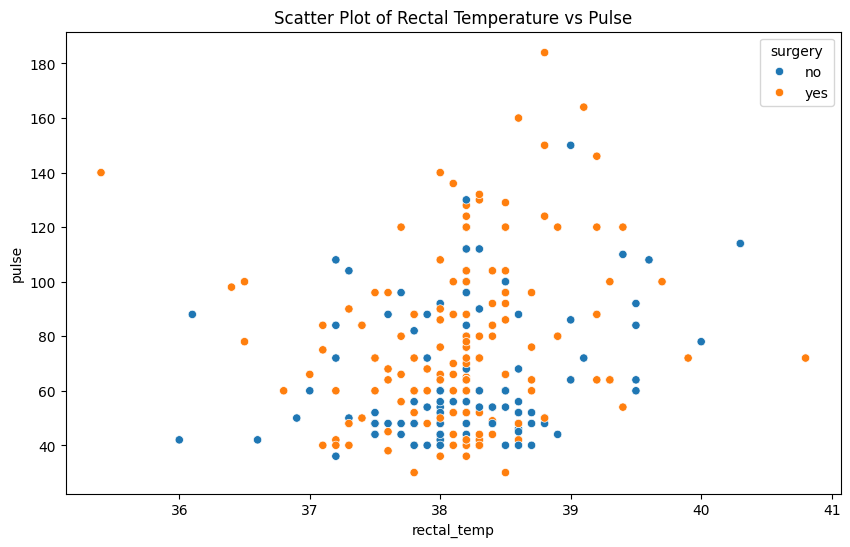

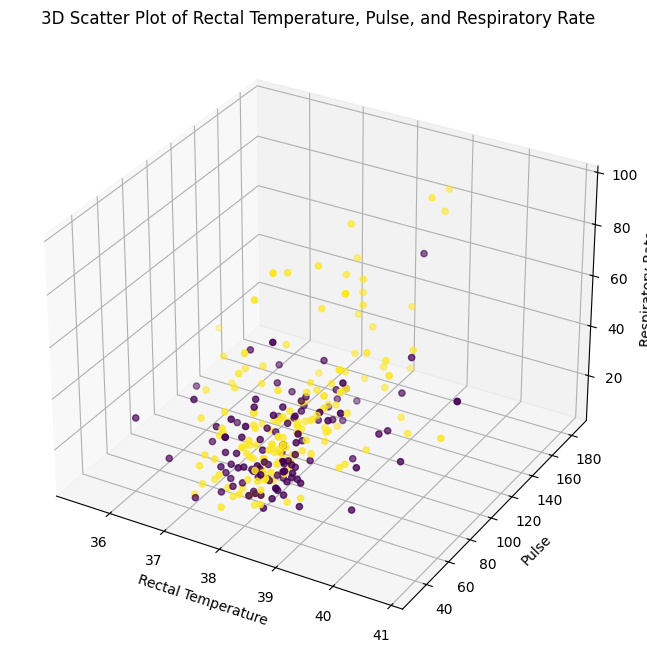

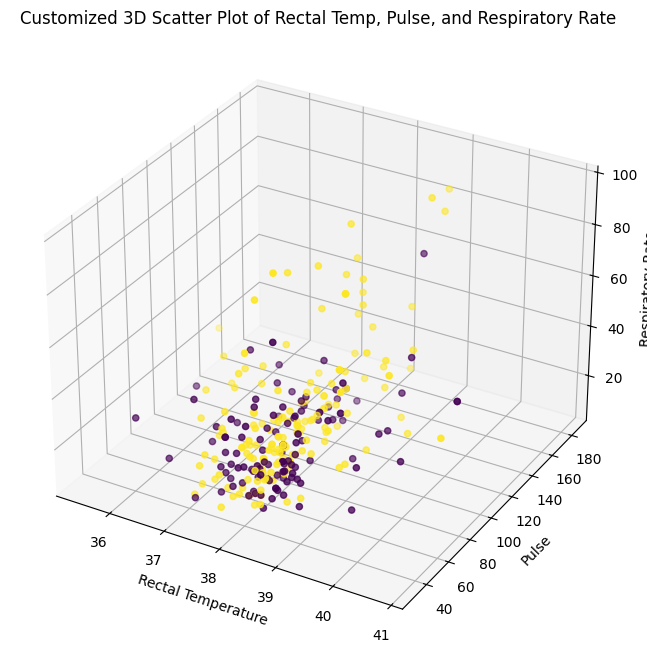

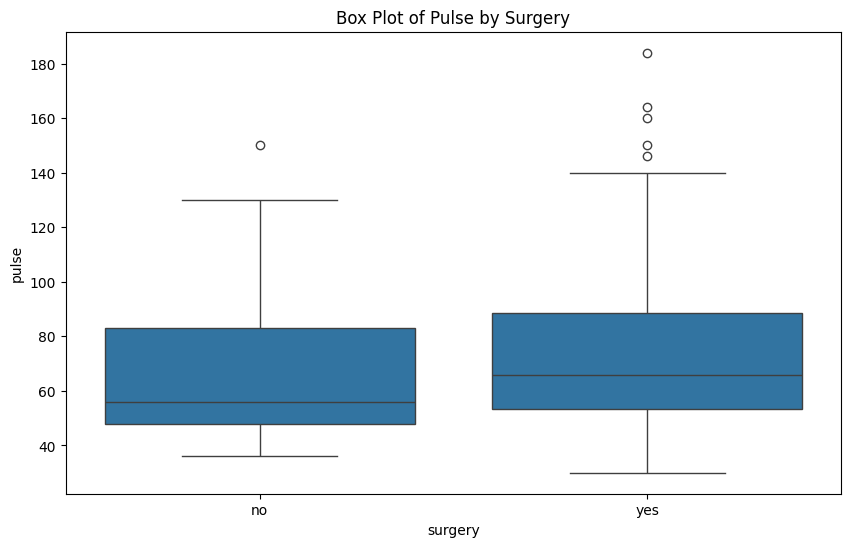

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go



### 3. Two-way Contingency Tables ###

# Categorical-Categorical (e.g., categorical features like Surgery vs Age)
cat_cat_table = pd.crosstab(horse_df['surgery'], horse_df['age'])
print("\nCategorical-Categorical Contingency Table (Surgery vs Age):\n", cat_cat_table)

# Numerical-Numerical (correlation matrix for numerical variables)
num_num_corr = horse_df[numerical_cols].corr()
print("\nNumerical-Numerical Correlation Matrix:\n", num_num_corr)

# Categorical-Numerical (mean values of a numerical column by a categorical column)
cat_num_table = horse_df.groupby('surgery')['rectal_temp'].mean()
print("\nCategorical-Numerical Table (Average Rectal Temperature by Surgery):\n", cat_num_table)

### 4. Three-way Contingency Table ###

# Three-way table (e.g., Surgery vs Age vs Outcome)
three_way_table = pd.crosstab([horse_df['surgery'], horse_df['age']], horse_df['outcome'])
print("\nThree-way Contingency Table (Surgery vs Age vs Outcome):\n", three_way_table)

### 5. Row Profile, Column Profile, Relative Frequency, and Chi-square ###

# Row Profile
row_profile = three_way_table.div(three_way_table.sum(axis=1), axis=0)
print("\nRow Profile:\n", row_profile)

# Column Profile
column_profile = three_way_table.div(three_way_table.sum(axis=0), axis=1)
print("\nColumn Profile:\n", column_profile)

# Relative Frequency
relative_freq = three_way_table / three_way_table.values.sum()
print("\nRelative Frequency Table:\n", relative_freq)

# Chi-square Test
chi2, p, dof, ex = chi2_contingency(three_way_table)
print("\nChi-square Test Results:\n", f"Chi2: {chi2}, p-value: {p}, DOF: {dof}")

### 6. Scatter Plot ###

# Scatter plot (e.g., rectal_temp vs pulse)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rectal_temp', y='pulse', data=horse_df, hue='surgery')
plt.title("Scatter Plot of Rectal Temperature vs Pulse")
plt.show()

### 7. 3D Scatter Plot ###

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(horse_df['rectal_temp'], horse_df['pulse'], horse_df['respiratory_rate'], c=horse_df['surgery'].astype('category').cat.codes)
ax.set_xlabel('Rectal Temperature')
ax.set_ylabel('Pulse')
ax.set_zlabel('Respiratory Rate')
plt.title("3D Scatter Plot of Rectal Temperature, Pulse, and Respiratory Rate")
plt.show()

### 8. Customized 3D Scatter Plot with color, shape, and bars ###

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(horse_df['rectal_temp'], horse_df['pulse'], horse_df['respiratory_rate'], c=horse_df['surgery'].astype('category').cat.codes, marker='o')
ax.set_xlabel('Rectal Temperature')
ax.set_ylabel('Pulse')
ax.set_zlabel('Respiratory Rate')
plt.title("Customized 3D Scatter Plot of Rectal Temp, Pulse, and Respiratory Rate")
plt.show()

### 9. 3D Bar Plot ###

bar_data = three_way_table.stack().reset_index()
bar_data.columns = ['Surgery', 'Age', 'Outcome', 'Count']

# Create 3D bar plot using Mesh3d
fig = go.Figure(data=[go.Mesh3d(
    x=bar_data['Age'].astype(str),  # Categorical values for Age
    y=bar_data['Surgery'].astype(str),  # Categorical values for Surgery
    z=bar_data['Count'],
    opacity=0.5,
    color='royalblue'
)])

# Customize plot layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Surgery'),
        zaxis=dict(title='Count')
    ),
    title="3D Bar Plot of Surgery vs Age vs Outcome"
)
fig.show()

### 10. 2D Box Plot ###

plt.figure(figsize=(10, 6))
sns.boxplot(x='surgery', y='pulse', data=horse_df)
plt.title("Box Plot of Pulse by Surgery")
plt.show()

### 11. Radar Plot (Sunray Plot) ###

# Prepare data for radar chart
# Normalize columns to a [0, 1] range

# Ensure 'rectal_temp', 'pulse', and 'respiratory_rate' columns are in the dataset and numeric
if all(col in horse_df.columns for col in ['rectal_temp', 'pulse', 'respiratory_rate']):

    # Group by 'surgery' and compute mean only for numeric columns of interest
    cat_data = horse_df.groupby('surgery')[['rectal_temp', 'pulse', 'respiratory_rate']].mean().T

    # Normalize the data for radar plot (0 to 1 range)
    cat_data_normalized = cat_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    # Convert data to long format for plotly
    cat_data_long = cat_data_normalized.reset_index().melt(id_vars='index')
    cat_data_long.columns = ['Metric', 'Surgery', 'Value']

    # Create radar plot
    fig = px.line_polar(cat_data_long, r='Value', theta='Metric', color='Surgery', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title="Radar Plot for Horse Data (Normalized Values)")
    fig.show()
else:
    print("One or more of the required columns ('rectal_temp', 'pulse', 'respiratory_rate') are missing or not numeric.")

